# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[1]

'barrow'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "Imperial"
#api.openweathermap.org/data/2.5/weather?q=cities[0]&appid={weather_api_key}
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
response = requests.get(url).json()
#pprint(response)



In [9]:

city_name = []
city_id = []
city_temp = []
city_lat = []
city_lon = []
city_hum = []
city_clouds = []
city_temp_max = []
city_wind = []
city_country = []
city_hem = []
city_ideal = []
units = "Imperial"

for city in cities:
    
    print(city)
    try:
        #api.openweathermap.org/data/2.5/weather?q=cities[0]&appid={weather_api_key}
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
        response = requests.get(url).json()
        #pprint(response)
        city_name.append(response['name'])
        city_id.append(response['id'])
        city_temp.append(response['main']['temp'])
        city_lat.append(response['coord']['lat'])
        this_lat = response['coord']['lat']

        city_lon.append(response['coord']['lon'])
        city_hum.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        this_clouds = response['clouds']['all']
        city_temp_max.append(response['main']['temp_max'])
        this_temp_max = response['main']['temp_max']
        city_wind.append(response['wind']['speed'])
        this_wind = response['wind']['speed']
        city_country.append(response['sys']['country'])

        if this_lat >= 0:
            city_hem.append('North')
        else:
            city_hem.append('South')

        #Narrow down the DataFrame to find your ideal weather condition. For example:
        #A max temperature lower than 80 degrees but higher than 70.
         # * Wind speed less than 10 mph.
        #  * Zero cloudiness.

        if (this_wind < 10) and (this_clouds == 0) and (this_temp_max >70 and this_temp_max < 80):
            city_ideal.append('True')
        else:
            city_ideal.append('False')
    except:
        pass
    
    


 

broken hill
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -31.95, 'lon': 141.43},
 'dt': 1588361547,
 'id': 2173911,
 'main': {'feels_like': 39.43,
          'humidity': 87,
          'pressure': 1015,
          'temp': 50,
          'temp_max': 50,
          'temp_min': 50},
 'name': 'Broken Hill',
 'sys': {'country': 'AU',
         'id': 9491,
         'sunrise': 1588367198,
         'sunset': 1588406144,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 17.22}}
barrow
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 71.29, 'lon': -156.79},
 'dt': 1588361548,
 'id': 5880054,
 'main': {'feels_like': 10.11,
          'humidity': 85,
          'pressure': 1017,
          'temp': 19.4,
          'temp_max': 19.4,
          'temp_min': 19.4},
 'name': 'Barro

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1588361549,
 'id': 3833367,
 'main': {'feels_like': 38.93,
          'humidity': 81,
          'pressure': 1020,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'sunrise': 1588334088,
         'sunset': 1588367129,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 5.82}}
torbay
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 47.67, 'lon': -52.73},
 'dt': 1588361549,
 'id': 6167817,
 'main': {'feels_like': 47.25,
          'humidity': 18,
          'pressure': 1024,
          'temp': 61.52,
          'temp_max': 62.01,
          'temp_min': 60.8},
 'name': 'Torbay',
 'sy

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.1, 'lon': -79.24},
 'dt': 1588361855,
 'id': 5122534,
 'main': {'feels_like': 40.96,
          'humidity': 93,
          'pressure': 1012,
          'temp': 46.71,
          'temp_max': 46.99,
          'temp_min': 46.4},
 'name': 'Jamestown',
 'sys': {'country': 'US',
         'id': 4588,
         'sunrise': 1588327915,
         'sunset': 1588378553,
         'type': 1},
 'timezone': -14400,
 'visibility': 4023,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 310, 'speed': 8.05}}
esperance
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -33.87, 'lon': 121.9},
 'dt': 1588361929,
 'id': 2071860,
 'main': {'feels_like': 41.76,
          'humidity': 87,
          'pressure': 1025,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2},
 'name': 'Esperance',
 'sys': {'country': 'AU',
         'id': 9525,
     

{'cod': '404', 'message': 'city not found'}
tidore
{'cod': '404', 'message': 'city not found'}
hambantota
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 6.12, 'lon': 81.12},
 'dt': 1588361931,
 'id': 1244926,
 'main': {'feels_like': 89.62,
          'humidity': 100,
          'pressure': 1010,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Hambantota',
 'sys': {'country': 'LK',
         'id': 9124,
         'sunrise': 1588378929,
         'sunset': 1588423360,
         'type': 1},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 3.36}}
new norfolk
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -42.78, 'lon': 147.06},
 'dt': 1588361932,
 'id': 2155415,
 'main': {'feels_like': 41.58,
          'humidity': 81,
          'pressure'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 40.16, 'lon': -8.33},
 'dt': 1588361933,
 'id': 2738381,
 'main': {'feels_like': 64.47,
          'humidity': 89,
          'pressure': 1021,
          'temp': 63,
          'temp_max': 63,
          'temp_min': 63},
 'name': 'Lata',
 'sys': {'country': 'PT',
         'id': 2001739,
         'sunrise': 1588311152,
         'sunset': 1588361282,
         'type': 3},
 'timezone': 3600,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 355, 'gust': 5.99, 'speed': 3}}
chadiza
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -14.07, 'lon': 32.44},
 'dt': 1588361933,
 'id': 921028,
 'main': {'feels_like': 63.79,
          'grnd_level': 899,
          'humidity': 66,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 64.85,
          'temp_max': 64.85,
          'te

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 56.17, 'lon': 107.45},
 'dt': 1588361935,
 'id': 2020584,
 'main': {'feels_like': 23.52,
          'grnd_level': 970,
          'humidity': 81,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 30.65,
          'temp_max': 30.65,
          'temp_min': 30.65},
 'name': "Magistral'nyy",
 'sys': {'country': 'RU', 'sunrise': 1588366980, 'sunset': 1588422671},
 'timezone': 28800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 346, 'speed': 4.81}}
ilulissat
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1588361935,
 'id': 3423146,
 'main': {'feels_like': 24.37,
          'humidity': 59,
          'pressure': 1014,
          'temp': 33.8,
          'temp_max': 33.8,
          'temp_min': 33.8},
 'name': 'Ilulissat',
 'sys': {'count

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 58.36, 'lon': 82.83},
 'dt': 1588361937,
 'id': 1489499,
 'main': {'feels_like': 37.24,
          'grnd_level': 990,
          'humidity': 85,
          'pressure': 999,
          'sea_level': 999,
          'temp': 45.66,
          'temp_max': 45.66,
          'temp_min': 45.66},
 'name': 'Togur',
 'rain': {'1h': 0.15},
 'sys': {'country': 'RU', 'sunrise': 1588372294, 'sunset': 1588429174},
 'timezone': 25200,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 245, 'speed': 11.5}}
aklavik
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 68.22, 'lon': -135.01},
 'dt': 1588361937,
 'id': 5882953,
 'main': {'feels_like': 18.73,
          'humidity': 46,
          'pressure': 1016,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': 'Aklavik',
 'sys': {'co

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 7.53, 'lon': -12.51},
 'dt': 1588361939,
 'id': 2409914,
 'main': {'feels_like': 88.66,
          'grnd_level': 1012,
          'humidity': 81,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 82.45,
          'temp_max': 82.45,
          'temp_min': 82.45},
 'name': 'Bonthe',
 'sys': {'country': 'SL', 'sunrise': 1588314917, 'sunset': 1588359523},
 'timezone': 0,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 223, 'speed': 8.43}}
jalu
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.03, 'lon': 21.55},
 'dt': 1588361939,
 'id': 86049,
 'main': {'feels_like': 57.31,
          'grnd_level': 1010,
          'humidity': 37,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 71.8,
          'temp_max': 71.8,
          'temp_min': 71.8}

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 52.42, 'lon': 136.49},
 'dt': 1588361942,
 'id': 2023584,
 'main': {'feels_like': 16.2,
          'grnd_level': 979,
          'humidity': 92,
          'pressure': 987,
          'sea_level': 987,
          'temp': 31.77,
          'temp_max': 31.77,
          'temp_min': 31.77},
 'name': 'Imeni Poliny Osipenko',
 'sys': {'country': 'RU', 'sunrise': 1588360857, 'sunset': 1588414856},
 'timezone': 36000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 359, 'speed': 20.74}}
amderma
{'cod': '404', 'message': 'city not found'}
atuona
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1588361942,
 'id': 4020109,
 'main': {'feels_like': 80.73,
          'grnd_level': 1011,
          'humidity': 80,
          'pressure': 1013,
          'sea_level': 1013,
   

{'base': 'stations',
 'clouds': {'all': 84},
 'cod': 200,
 'coord': {'lat': 67.8, 'lon': 130.41},
 'dt': 1588361944,
 'id': 2027042,
 'main': {'feels_like': 3.83,
          'grnd_level': 944,
          'humidity': 89,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 10.17,
          'temp_max': 10.17,
          'temp_min': 10.17},
 'name': 'Batagay-Alyta',
 'sys': {'country': 'RU', 'sunrise': 1588356759, 'sunset': 1588421872},
 'timezone': 32400,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 247, 'speed': 0.74}}
ilhabela
{'base': 'stations',
 'clouds': {'all': 73},
 'cod': 200,
 'coord': {'lat': -23.78, 'lon': -45.36},
 'dt': 1588361944,
 'id': 3461425,
 'main': {'feels_like': 77.76,
          'grnd_level': 1017,
          'humidity': 83,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 73.87,
          'temp_max': 73.87,
         

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -0.7, 'lon': 10.24},
 'dt': 1588361946,
 'id': 2399888,
 'main': {'feels_like': 87.08,
          'grnd_level': 1010,
          'humidity': 89,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 78.76,
          'temp_max': 78.76,
          'temp_min': 78.76},
 'name': 'Lambaréné',
 'sys': {'country': 'GA', 'sunrise': 1588310000, 'sunset': 1588353521},
 'timezone': 3600,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 255, 'speed': 3.87}}
wagar
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 16.15, 'lon': 36.2},
 'dt': 1588361946,
 'id': 364027,
 'main': {'feels_like': 72.41,
          'grnd_level': 962,
          'humidity': 11,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 82.8,
          'temp_max': 82.8,
          'temp_min': 82

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -35.72, 'lon': 150.18},
 'dt': 1588361948,
 'id': 2176639,
 'main': {'feels_like': 44.98,
          'humidity': 57,
          'pressure': 997,
          'temp': 55,
          'temp_max': 55,
          'temp_min': 55},
 'name': 'Batemans Bay',
 'sys': {'country': 'AU',
         'id': 37860,
         'sunrise': 1588365452,
         'sunset': 1588403690,
         'type': 3},
 'timezone': 36000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'speed': 13.87}}
harper
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 4.38, 'lon': -7.72},
 'dt': 1588361948,
 'id': 2276492,
 'main': {'feels_like': 89.69,
          'grnd_level': 1012,
          'humidity': 83,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 81.72,
          'temp_max': 81.72,
          'temp_

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.64},
 'dt': 1588361696,
 'id': 2729907,
 'main': {'feels_like': 15.98,
          'humidity': 85,
          'pressure': 1011,
          'temp': 24.8,
          'temp_max': 24.8,
          'temp_min': 24.8},
 'name': 'Longyearbyen',
 'sys': {'country': 'SJ', 'id': 1663, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 6.93}}
muisne
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 0.6, 'lon': -80.03},
 'dt': 1588361950,
 'id': 3653967,
 'main': {'feels_like': 92.23,
          'humidity': 74,
          'pressure': 1011,
          'temp': 86,
          'temp_max': 86,
          'temp_min': 86},
 'name': 'Muisne',
 'sys': {'country': 'EC',
         'id': 8550,
         'sunrise'

{'cod': '404', 'message': 'city not found'}
saleaula
{'cod': '404', 'message': 'city not found'}
falealupo
{'cod': '404', 'message': 'city not found'}
motoseni
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 46.33, 'lon': 27.38},
 'dt': 1588361952,
 'id': 672760,
 'main': {'feels_like': 55.45,
          'humidity': 87,
          'pressure': 1006,
          'temp': 57.09,
          'temp_max': 57.2,
          'temp_min': 57},
 'name': 'Motoşeni',
 'sys': {'country': 'RO',
         'id': 6909,
         'sunrise': 1588301767,
         'sunset': 1588353527,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 4.7}}
ugoofaaru
{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 5.67, 'lon': 73},
 'dt': 1588361953,
 'id': 1337619,
 'main': {'feels_like': 89.06,
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.57, 'lon': 131.15},
 'dt': 1588361954,
 'id': 2036081,
 'main': {'feels_like': 44.28,
          'grnd_level': 977,
          'humidity': 75,
          'pressure': 1000,
          'sea_level': 1000,
          'temp': 50.45,
          'temp_max': 50.45,
          'temp_min': 50.45},
 'name': 'Lingdong',
 'sys': {'country': 'CN', 'sunrise': 1588363161, 'sunset': 1588415115},
 'timezone': 28800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 234, 'speed': 8.05}}
eyl
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.98, 'lon': 49.82},
 'dt': 1588361954,
 'id': 60019,
 'main': {'feels_like': 89.85,
          'grnd_level': 1006,
          'humidity': 69,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 86.63,
          'temp_max': 86.63,
          'temp_min': 86.63

{'cod': '404', 'message': 'city not found'}
saskylakh
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 71.92, 'lon': 114.08},
 'dt': 1588361956,
 'id': 2017155,
 'main': {'feels_like': 1.33,
          'grnd_level': 1011,
          'humidity': 95,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 10.51,
          'temp_max': 10.51,
          'temp_min': 10.51},
 'name': 'Saskylakh',
 'sys': {'country': 'RU', 'sunrise': 1588356442, 'sunset': 1588430027},
 'timezone': 32400,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 311, 'speed': 5.97}}
kodiak
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.41},
 'dt': 1588361956,
 'id': 5866583,
 'main': {'feels_like': 37.04,
          'humidity': 60,
          'pressure': 1013,
          'temp': 42.8,
          'temp_max': 42.8,
          'temp_mi

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.47, 'lon': 72.8},
 'dt': 1588361958,
 'id': 1259841,
 'main': {'feels_like': 91.54,
          'humidity': 30,
          'pressure': 1007,
          'temp': 93.2,
          'temp_max': 93.2,
          'temp_min': 93.2},
 'name': 'Petlād',
 'sys': {'country': 'IN',
         'id': 9049,
         'sunrise': 1588379740,
         'sunset': 1588426542,
         'type': 1},
 'timezone': 19800,
 'visibility': 4000,
 'weather': [{'description': 'smoke',
              'icon': '50n',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 290, 'speed': 6.93}}
villa rica
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.73, 'lon': -84.92},
 'dt': 1588361959,
 'id': 4228452,
 'main': {'feels_like': 61.3,
          'humidity': 32,
          'pressure': 1019,
          'temp': 69.62,
          'temp_max': 71.01,
          'temp_min': 68},
 'name': 'Villa Rica',
 'sys': {'country

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.38, 'lon': 178.42},
 'dt': 1588361960,
 'id': 2123814,
 'main': {'feels_like': 12.24,
          'grnd_level': 1014,
          'humidity': 91,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 21.61,
          'temp_max': 21.61,
          'temp_min': 21.61},
 'name': 'Leningradskiy',
 'sys': {'country': 'RU', 'sunrise': 1588344042, 'sunset': 1588411546},
 'timezone': 43200,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 124, 'speed': 7.7}}
komsomolskiy
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 40.43, 'lon': 71.72},
 'dt': 1588361961,
 'id': 1513491,
 'main': {'feels_like': 65.91,
          'humidity': 56,
          'pressure': 1009,
          'temp': 68,
          'temp_max': 68,
          'temp_min': 68},
 'name': 'Yangi Marg`ilon',
 'sys': {'country': '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.23, 'lon': 34.64},
 'dt': 1588361962,
 'id': 699706,
 'main': {'feels_like': 51.24,
          'grnd_level': 1007,
          'humidity': 54,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 56.79,
          'temp_max': 56.79,
          'temp_min': 56.79},
 'name': 'Novooleksiyivka',
 'sys': {'country': 'UA', 'sunrise': 1588300042, 'sunset': 1588351768},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 5.99}}
cloquet
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 46.72, 'lon': -92.46},
 'dt': 1588361963,
 'id': 5021632,
 'main': {'feels_like': 47.14,
          'humidity': 27,
          'pressure': 1010,
          'temp': 58.8,
          'temp_max': 62.6,
          'temp_min': 55.99},
 'name': 'Cloquet',
 'rain': {'1h': 0.25},
 '

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -28.55, 'lon': 16.43},
 'dt': 1588361965,
 'id': 3354071,
 'main': {'feels_like': 62.22,
          'grnd_level': 1014,
          'humidity': 58,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 64.49,
          'temp_max': 64.49,
          'temp_min': 64.49},
 'name': 'Oranjemund',
 'sys': {'country': 'NA', 'sunrise': 1588310478, 'sunset': 1588350072},
 'timezone': 7200,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 241, 'speed': 3.89}}
obregon
{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': 11.96, 'lon': -85.96},
 'dt': 1588361965,
 'id': 3617723,
 'main': {'feels_like': 94.66,
          'grnd_level': 1004,
          'humidity': 30,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 97,
          'temp_max': 97,
          'temp

{'base': 'stations',
 'clouds': {'all': 23},
 'cod': 200,
 'coord': {'lat': 36.27, 'lon': -118.8},
 'dt': 1588361967,
 'id': 5403789,
 'main': {'feels_like': 62.58,
          'humidity': 42,
          'pressure': 1017,
          'temp': 65.55,
          'temp_max': 75,
          'temp_min': 57.99},
 'name': 'Tulare',
 'sys': {'country': 'US',
         'id': 2006135,
         'sunrise': 1588338083,
         'sunset': 1588387372,
         'type': 3},
 'timezone': -25200,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 255, 'gust': 7, 'speed': 1.99}}
yarmouth
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.71, 'lon': -70.23},
 'dt': 1588361967,
 'id': 4956335,
 'main': {'feels_like': 52.43,
          'humidity': 93,
          'pressure': 1004,
          'temp': 54.82,
          'temp_max': 57,
          'temp_min': 52},
 'name': 'Yarmouth',
 'sys': {'country':

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.69, 'lon': 58.53},
 'dt': 1588361968,
 'id': 287832,
 'main': {'feels_like': 84.2,
          'grnd_level': 960,
          'humidity': 47,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 83.8,
          'temp_max': 83.8,
          'temp_min': 83.8},
 'name': 'Ibrā’',
 'sys': {'country': 'OM', 'sunrise': 1588296784, 'sunset': 1588343559},
 'timezone': 14400,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 205, 'speed': 6.04}}
kampong cham
{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 11.99, 'lon': 105.46},
 'dt': 1588361969,
 'id': 1831173,
 'main': {'feels_like': 83.16,
          'grnd_level': 1005,
          'humidity': 73,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 80.92,
          'temp_max': 80.92,
          'temp_min': 80

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 14.05, 'lon': 124.17},
 'dt': 1588361970,
 'id': 1695546,
 'main': {'feels_like': 85.35,
          'grnd_level': 1008,
          'humidity': 85,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 79.52,
          'temp_max': 79.52,
          'temp_min': 79.52},
 'name': 'Pandan',
 'rain': {'1h': 0.23},
 'sys': {'country': 'PH', 'sunrise': 1588368050, 'sunset': 1588413576},
 'timezone': 28800,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 58, 'speed': 7.61}}
helsinki
{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': 60.17, 'lon': 24.94},
 'dt': 1588361910,
 'id': 658225,
 'main': {'feels_like': 33.1,
          'humidity': 52,
          'pressure': 1010,
          'temp': 44.98,
          'temp_max': 46,
          'temp_min': 44.01},
 'name': 'Helsinki',
 'sys': {'

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.44, 'lon': -20.27},
 'dt': 1588361972,
 'id': 3412093,
 'main': {'feels_like': 37.11,
          'humidity': 75,
          'pressure': 1010,
          'temp': 42.8,
          'temp_max': 42.8,
          'temp_min': 42.8},
 'name': 'Vestmannaeyjar',
 'sys': {'country': 'IS',
         'id': 93,
         'sunrise': 1588309002,
         'sunset': 1588369163,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 4.7}}
valparaiso
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.04, 'lon': -71.63},
 'dt': 1588361972,
 'id': 3868626,
 'main': {'feels_like': 61.52,
          'humidity': 52,
          'pressure': 1016,
          'temp': 65.41,
          'temp_max': 66.2,
          'temp_min': 64.4},
 'name': 'Valparaíso',


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.7, 'lon': 133.88},
 'dt': 1588361883,
 'id': 2077895,
 'main': {'feels_like': 36.73,
          'humidity': 44,
          'pressure': 1021,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Alice Springs',
 'sys': {'country': 'AU',
         'id': 9483,
         'sunrise': 1588368323,
         'sunset': 1588408643,
         'type': 1},
 'timezone': 34200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 170, 'speed': 5.82}}
bandar-e lengeh
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.56, 'lon': 54.88},
 'dt': 1588361974,
 'id': 141665,
 'main': {'feels_like': 90.18,
          'humidity': 46,
          'pressure': 1006,
          'temp': 89.6,
          'temp_max': 89.6,
          'temp_min': 89.6},
 'name': 'Bandar-e Len

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 59.53, 'lon': 33.92},
 'dt': 1588361976,
 'id': 497024,
 'main': {'feels_like': 24.39,
          'grnd_level': 1003,
          'humidity': 91,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 32.16,
          'temp_max': 32.16,
          'temp_min': 32.16},
 'name': 'Senno',
 'sys': {'country': 'RU', 'sunrise': 1588297419, 'sunset': 1588354736},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 123, 'speed': 6.93}}
ulaangom
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.98, 'lon': 92.07},
 'dt': 1588361976,
 'id': 1515029,
 'main': {'feels_like': 42.31,
          'grnd_level': 909,
          'humidity': 39,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 47.8,
          'temp_max': 47.8,
          'temp_min': 47.8},

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -41.87, 'lon': -73.82},
 'dt': 1588361979,
 'id': 3899695,
 'main': {'feels_like': 52.83,
          'humidity': 77,
          'pressure': 1014,
          'temp': 60.8,
          'temp_max': 60.8,
          'temp_min': 60.8},
 'name': 'Ancud',
 'sys': {'country': 'CL',
         'id': 8512,
         'sunrise': 1588333449,
         'sunset': 1588370417,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 340, 'speed': 16.11}}
porbandar
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 21.64, 'lon': 69.61},
 'dt': 1588361979,
 'id': 1259395,
 'main': {'feels_like': 85.95,
          'grnd_level': 1008,
          'humidity': 88,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 80.53,
          'temp_max': 80.5

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.38, 'lon': -52.95},
 'dt': 1588361981,
 'id': 3380290,
 'main': {'feels_like': 83.07,
          'grnd_level': 1012,
          'humidity': 83,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 80.31,
          'temp_max': 80.31,
          'temp_min': 80.31},
 'name': 'Sinnamary',
 'sys': {'country': 'GF', 'sunrise': 1588324764, 'sunset': 1588369086},
 'timezone': -10800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 71, 'speed': 13.13}}
tura
{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 25.52, 'lon': 90.22},
 'dt': 1588361981,
 'id': 1254046,
 'main': {'feels_like': 73.35,
          'grnd_level': 965,
          'humidity': 64,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 72.1,
          'temp_max': 72.1,
          'temp_

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.33, 'lon': 43.98},
 'dt': 1588361983,
 'id': 107304,
 'main': {'feels_like': 77.63,
          'humidity': 26,
          'pressure': 1008,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Buraidah',
 'sys': {'country': 'SA',
         'id': 7411,
         'sunrise': 1588299979,
         'sunset': 1588347348,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 2.24}}
ames
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 42.03, 'lon': -93.62},
 'dt': 1588361983,
 'id': 4846834,
 'main': {'feels_like': 63.82,
          'humidity': 41,
          'pressure': 1009,
          'temp': 75.43,
          'temp_max': 77,
          'temp_min': 75},
 'name': 'Ames',
 'sys': {'country': 'US'

{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': -15.43, 'lon': -74.62},
 'dt': 1588361984,
 'id': 3948613,
 'main': {'feels_like': 76.55,
          'grnd_level': 994,
          'humidity': 47,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 79.21,
          'temp_max': 79.21,
          'temp_min': 79.21},
 'name': 'Acarí',
 'sys': {'country': 'PE', 'sunrise': 1588331348, 'sunset': 1588372902},
 'timezone': -18000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 191, 'speed': 8.79}}
madimba
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -10.4, 'lon': 40.33},
 'dt': 1588361985,
 'id': 878141,
 'main': {'feels_like': 81.64,
          'humidity': 94,
          'pressure': 1016,
          'temp': 77,
          'temp_max': 77,
          'temp_min': 77},
 'name': 'Madimba',
 'sys': {'country': 'TZ',
         'id': 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 46.49, 'lon': 135.88},
 'dt': 1588361986,
 'id': 2013279,
 'main': {'feels_like': 42.44,
          'grnd_level': 917,
          'humidity': 78,
          'pressure': 997,
          'sea_level': 997,
          'temp': 48.09,
          'temp_max': 48.09,
          'temp_min': 48.09},
 'name': 'Vostok',
 'sys': {'country': 'RU', 'sunrise': 1588362039, 'sunset': 1588413967},
 'timezone': 36000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 6.64}}
temple
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 31.1, 'lon': -97.34},
 'dt': 1588361723,
 'id': 4735966,
 'main': {'feels_like': 73.13,
          'humidity': 42,
          'pressure': 1016,
          'temp': 83.07,
          'temp_max': 84,
          'temp_min': 82.4},
 'name': 'Temple',
 'sys': {'country': 'US',
      

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.34, 'lon': 90.74},
 'dt': 1588361988,
 'id': 1185251,
 'main': {'feels_like': 85.19,
          'grnd_level': 1007,
          'humidity': 72,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 80.69,
          'temp_max': 80.69,
          'temp_min': 80.69},
 'name': 'Lālmohan',
 'sys': {'country': 'BD', 'sunrise': 1588375446, 'sunset': 1588422225},
 'timezone': 21600,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 236, 'speed': 6.31}}
biak
{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': -0.91, 'lon': 122.88},
 'dt': 1588361988,
 'id': 1637001,
 'main': {'feels_like': 82.81,
          'grnd_level': 994,
          'humidity': 76,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 78.26,
          'temp_max': 78.26,
          'temp_min': 78

{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': 67.45, 'lon': 153.68},
 'dt': 1588361990,
 'id': 2121025,
 'main': {'feels_like': 19.74,
          'grnd_level': 1004,
          'humidity': 96,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 27.43,
          'temp_max': 27.43,
          'temp_min': 27.43},
 'name': 'Srednekolymsk',
 'sys': {'country': 'RU', 'sunrise': 1588351430, 'sunset': 1588416033},
 'timezone': 39600,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 196, 'speed': 5.99}}
port augusta
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -32.5, 'lon': 137.77},
 'dt': 1588361990,
 'id': 2063056,
 'main': {'feels_like': 46.83,
          'humidity': 82,
          'pressure': 1017,
          'temp': 53.64,
          'temp_max': 55.4,
          'temp_min': 53.01},
 'name': 'Port Augusta',
 'sys': {

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -34.57, 'lon': 146.4},
 'dt': 1588361992,
 'id': 2160413,
 'main': {'feels_like': 37.63,
          'humidity': 76,
          'pressure': 1008,
          'temp': 48.11,
          'temp_max': 48.2,
          'temp_min': 48},
 'name': 'Leeton',
 'sys': {'country': 'AU',
         'id': 9561,
         'sunrise': 1588366248,
         'sunset': 1588404708,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 14.99}}
puerto escondido
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 15.85, 'lon': -97.07},
 'dt': 1588361992,
 'id': 3520994,
 'main': {'feels_like': 90.32,
          'humidity': 70,
          'pressure': 1013,
          'temp': 84.2,
          'temp_max': 84.2,
          'temp_min': 84.2},
 'name': 'Puerto 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -20.52, 'lon': 57.52},
 'dt': 1588361994,
 'id': 933995,
 'main': {'feels_like': 75.74,
          'humidity': 73,
          'pressure': 1020,
          'temp': 75.2,
          'temp_max': 75.2,
          'temp_min': 75.2},
 'name': 'Souillac',
 'sys': {'country': 'MU',
         'id': 2061,
         'sunrise': 1588299990,
         'sunset': 1588340838,
         'type': 1},
 'timezone': 14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 9.17}}
pochutla
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 15.74, 'lon': -96.47},
 'dt': 1588361994,
 'id': 3517970,
 'main': {'feels_like': 94.35,
          'humidity': 39,
          'pressure': 1012,
          'temp': 95,
          'temp_max': 95,
          'temp_min': 95},
 'name': 'Pochutla',
 'sys': {'coun

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 51.88, 'lon': 13.33},
 'dt': 1588361996,
 'id': 2896643,
 'main': {'feels_like': 45.3,
          'humidity': 62,
          'pressure': 1001,
          'temp': 52.14,
          'temp_max': 55.4,
          'temp_min': 48.99},
 'name': 'Ihlow',
 'rain': {'1h': 0.18},
 'sys': {'country': 'DE',
         'id': 1863,
         'sunrise': 1588304196,
         'sunset': 1588357841,
         'type': 1},
 'timezone': 7200,
 'visibility': 5000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 240, 'speed': 8.05}}
el bagre
{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 7.59, 'lon': -74.81},
 'dt': 1588361996,
 'id': 3684945,
 'main': {'feels_like': 94.55,
          'grnd_level': 1002,
          'humidity': 63,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 86.92,
          

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.1, 'lon': -105.28},
 'dt': 1588361924,
 'id': 6050066,
 'main': {'feels_like': 30.36,
          'humidity': 86,
          'pressure': 1009,
          'temp': 39.2,
          'temp_max': 39.2,
          'temp_min': 39.2},
 'name': 'La Ronge',
 'sys': {'country': 'CA',
         'id': 949,
         'sunrise': 1588331945,
         'sunset': 1588387021,
         'type': 1},
 'timezone': -21600,
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 10.29}}
muros
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 42.78, 'lon': -9.06},
 'dt': 1588361998,
 'id': 3115824,
 'main': {'feels_like': 56.01,
          'humidity': 93,
          'pressure': 1019,
          'temp': 61,
          'temp_max': 61,
          'temp_min': 61},
 'name': 'Muros',
 'rain': {'1h'

{'base': 'stations',
 'clouds': {'all': 91},
 'cod': 200,
 'coord': {'lat': 34.57, 'lon': 76.1},
 'dt': 1588362000,
 'id': 1267776,
 'main': {'feels_like': 31.96,
          'grnd_level': 681,
          'humidity': 19,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 40.08,
          'temp_max': 40.08,
          'temp_min': 40.08},
 'name': 'Kargil',
 'sys': {'country': 'IN', 'sunrise': 1588377857, 'sunset': 1588426841},
 'timezone': 19800,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 243, 'speed': 3.31}}
porto velho
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -8.76, 'lon': -63.9},
 'dt': 1588362000,
 'id': 3662762,
 'main': {'feels_like': 95.41,
          'humidity': 55,
          'pressure': 1011,
          'temp': 91.4,
          'temp_max': 91.4,
          'temp_min': 91.4},
 'name': 'Porto Velho',
 'sys': {'country': '

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -34.86, 'lon': -56.05},
 'dt': 1588362003,
 'id': 3441292,
 'main': {'feels_like': 61.47,
          'humidity': 68,
          'pressure': 1019,
          'temp': 64.29,
          'temp_max': 64.4,
          'temp_min': 64},
 'name': 'Paso de Carrasco',
 'sys': {'country': 'UY',
         'id': 8713,
         'sunrise': 1588328443,
         'sunset': 1588366895,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 190, 'speed': 6.93}}
warqla
{'cod': '404', 'message': 'city not found'}
voi
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -3.39, 'lon': 38.56},
 'dt': 1588362003,
 'id': 178522,
 'main': {'feels_like': 72.37,
          'grnd_level': 950,
          'humidity': 71,
          'pressure': 1015,
          'sea_level': 1015

{'base': 'stations',
 'clouds': {'all': 82},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': 88.53},
 'dt': 1588362007,
 'id': 1263776,
 'main': {'feels_like': 60.39,
          'grnd_level': 915,
          'humidity': 34,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 65.53,
          'temp_max': 65.53,
          'temp_min': 65.53},
 'name': 'Mangan',
 'sys': {'country': 'IN', 'sunrise': 1588375544, 'sunset': 1588423188},
 'timezone': 19800,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 12, 'speed': 4.03}}
banda aceh
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.56, 'lon': 95.32},
 'dt': 1588362007,
 'id': 1215502,
 'main': {'feels_like': 81.73,
          'grnd_level': 1007,
          'humidity': 88,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 77.7,
          'temp_max': 77.7,
          'temp_mi

 'wind': {'deg': 50, 'speed': 8.95}}
costinesti
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 43.95, 'lon': 28.63},
 'dt': 1588362010,
 'id': 680546,
 'main': {'feels_like': 56.93,
          'humidity': 77,
          'pressure': 1007,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Costineşti',
 'sys': {'country': 'RO',
         'id': 9689,
         'sunrise': 1588301807,
         'sunset': 1588352887,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 4.7}}
coihaique
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -45.58, 'lon': -72.07},
 'dt': 1588362010,
 'id': 3894426,
 'main': {'feels_like': 42.08,
          'humidity': 75,
          'pressure': 1015,
          'temp': 46.4,
          'temp_max': 46.4,
          '

          'humidity': 93,
          'pressure': 998,
          'temp': 46.4,
          'temp_max': 46.4,
          'temp_min': 46.4},
 'name': 'Brae',
 'rain': {'1h': 0.3},
 'sys': {'country': 'GB',
         'id': 1447,
         'sunrise': 1588305594,
         'sunset': 1588363489,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 60, 'speed': 13.87}}
porto walter
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -8.27, 'lon': -72.74},
 'dt': 1588362012,
 'id': 3662761,
 'main': {'feels_like': 92.35,
          'grnd_level': 988,
          'humidity': 87,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 82.17,
          'temp_max': 82.17,
          'temp_min': 82.17},
 'name': 'Porto Walter',
 'rain': {'1h': 1.4},
 'sys': {'country': 'BR', 'sunrise': 1588330411, 'sunset': 15883729

In [18]:
dict = {'name':city_name, 
        'country': city_country,
        'id': city_id, 
        'hem':city_hem,
        'temp':city_temp,
        'lat': city_lat,
        'lon': city_lon,
        'humidity': city_hum,
        'clouds' : city_clouds,
        'max_temp':city_temp_max,
        'wind':city_wind,
        'ideal':city_ideal
        } 
  
city_df = pd.DataFrame(dict) 


In [19]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
name        550 non-null object
country     550 non-null object
id          550 non-null int64
hem         550 non-null object
temp        550 non-null float64
lat         550 non-null float64
lon         550 non-null float64
humidity    550 non-null int64
clouds      550 non-null int64
max_temp    550 non-null float64
wind        550 non-null float64
ideal       550 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 51.7+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df.to_csv('weather_data.csv')


In [21]:
city_df

,name,country,id,hem,temp,lat,lon,humidity,clouds,max_temp,wind,ideal
0,Broken Hill,AU,2173911,South,50.00,-31.95,141.43,87,75,50.00,17.22,False
1,Barrow,US,5880054,North,19.40,71.29,-156.79,85,90,19.40,6.93,False
2,Norman Wells,CA,6089245,North,32.00,65.28,-126.83,95,20,32.00,9.17,False
3,Phonhong,LA,1655124,North,77.47,18.50,102.42,71,67,77.47,2.77,False
4,Kimbe,PG,2093967,South,76.32,-5.55,150.14,86,96,76.32,3.56,False
...,...,...,...,...,...,...,...,...,...,...,...,...
545,Khojaly District,AZ,147774,North,56.39,39.91,46.79,63,75,56.39,2.98,False
546,Ṭikāpur,NP,1282666,North,80.01,28.50,81.13,48,0,80.01,4.00,False
547,Brae,GB,2654970,North,46.40,60.40,-1.35,93,100,46.40,13.87,False
548,Porto Walter,BR,3662761,South,82.17,-8.27,-72.74,87,88,82.17,3.42,False


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

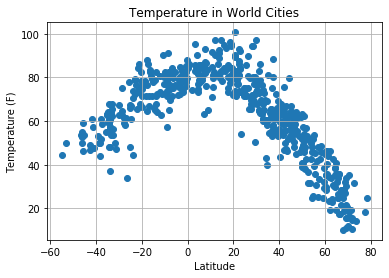

In [24]:
lats = city_df['lat']
temps = city_df['temp']

# Build a scatter plot for each data type
plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

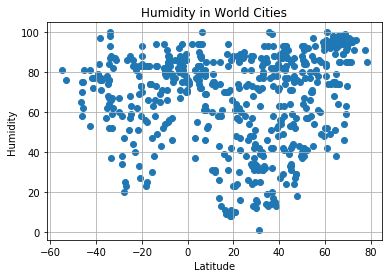

In [25]:
hum = city_df['humidity']

# Build a scatter plot for each data type
plt.scatter(lats, hum, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

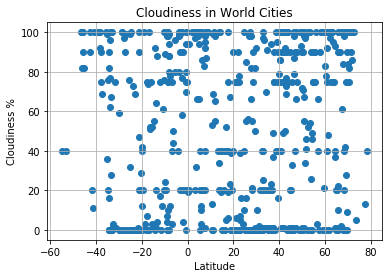

In [26]:
clouds = city_df['clouds']

# Build a scatter plot for each data type
plt.scatter(lats, clouds, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

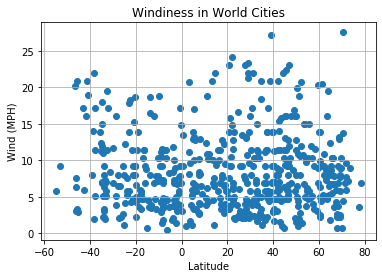

In [28]:
wind = city_df['wind']

# Build a scatter plot for each data type
plt.scatter(lats, wind, marker="o")

# Incorporate the other graph properties
plt.title("Windiness in World Cities")
plt.ylabel("Wind (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

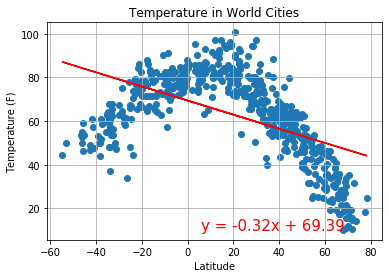

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = city_df['lat']
y_values = city_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()



#plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [34]:
# Create Northern and Southern Hemisphere DataFrames

north_df = city_df.loc[(city_df['hem'] == 'North')]
north_df

south_df = city_df.loc[(city_df['hem'] == 'South')]
south_df

,name,country,id,hem,temp,lat,lon,humidity,clouds,max_temp,wind,ideal
0,Broken Hill,AU,2173911,South,50.00,-31.95,141.43,87,75,50.00,17.22,False
4,Kimbe,PG,2093967,South,76.32,-5.55,150.14,86,96,76.32,3.56,False
8,Kavieng,PG,2094342,South,82.71,-2.57,150.80,75,100,82.71,4.92,False
11,Castro,BR,3466704,South,66.97,-24.79,-50.01,63,100,66.97,4.21,False
13,Ushuaia,AR,3833367,South,44.60,-54.80,-68.30,81,40,44.60,5.82,False
...,...,...,...,...,...,...,...,...,...,...,...,...
529,Tulungagung,ID,1623080,South,74.41,-8.07,111.90,86,94,74.41,1.79,False
536,Coyhaique,CL,3894426,South,46.40,-45.58,-72.07,75,90,46.40,3.36,False
538,Roebourne,AU,2062276,South,67.62,-20.78,117.13,27,0,67.62,15.19,False
544,Mangai,CD,2313084,South,71.83,-4.05,19.53,82,40,71.83,1.81,False


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

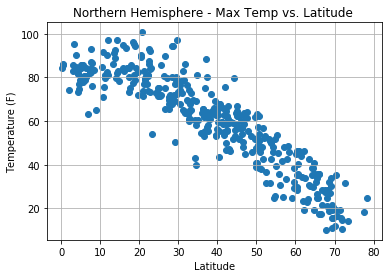

In [36]:
lats = north_df['lat']
temps = north_df['temp']

# Build a scatter plot for each data type
plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude ")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInNHemCities.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

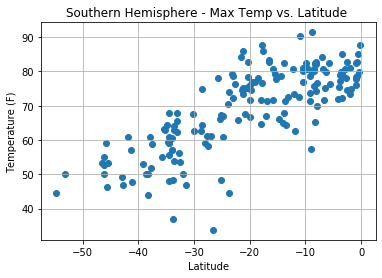

In [37]:
lats = south_df['lat']
temps = south_df['temp']

# Build a scatter plot for each data type
plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude ")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInSHemCities.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression